In [1]:
%matplotlib inline
#%reload_ext keras

import os
import numpy as np
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import json
import sys
from IPython.display import clear_output
print keras.__version__

Using TensorFlow backend.


2.1.5


In [2]:
# https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e
# updatable plot
# a minimal example (sort of)

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        #self.val_losses = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        #self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        #plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


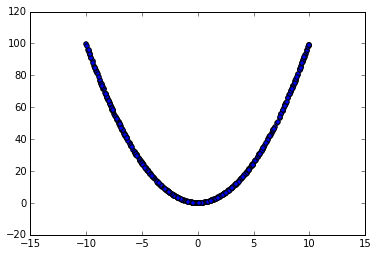

In [3]:
m=sys.maxint
m=10
x = np.array(np.random.uniform(-m,m,500))
y = np.array([xx * xx for xx in x])
plt.scatter(x,y)

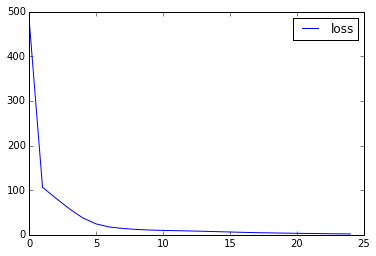

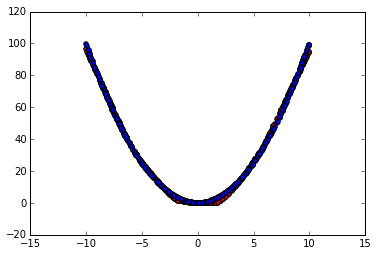

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

model = Sequential()
model.add(Dense(units=5, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(units=50))
model.add(Activation("relu"))
model.add(Dense(units=20))
model.add(Activation("relu"))
model.add(Dense(units=5))
model.add(Activation("relu"))
model.add(Dense(units=1))

sgd = optimizers.SGD(lr=0.0001, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.fit(x,y,epochs=25, shuffle=True,steps_per_epoch=100, callbacks=[plot_losses])

yy = model.predict(x, batch_size=32, verbose=0)

plt.scatter(x,yy,c='red')
plt.scatter(x,y,c='blue')
plt.show()

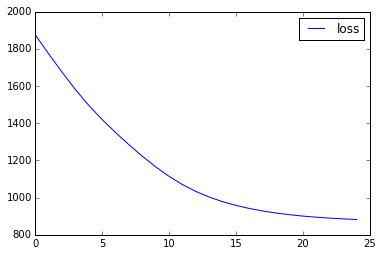

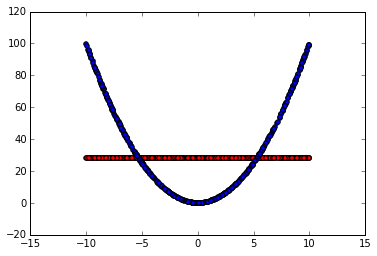

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

model = Sequential()
model.add(Dense(units=5, input_dim=1))
model.add(Activation("sigmoid"))
model.add(Dense(units=50))
model.add(Activation("sigmoid"))
model.add(Dense(units=20))
model.add(Activation("sigmoid"))
model.add(Dense(units=5))
model.add(Activation("sigmoid"))
model.add(Dense(units=1))

sgd = optimizers.SGD(lr=0.0001)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.fit(x,y,epochs=25, shuffle=True, steps_per_epoch=100, callbacks=[plot_losses])

yy = model.predict(x, batch_size=32, verbose=0)

plt.scatter(x,yy,c='red')
plt.scatter(x,y,c='blue')
plt.show()

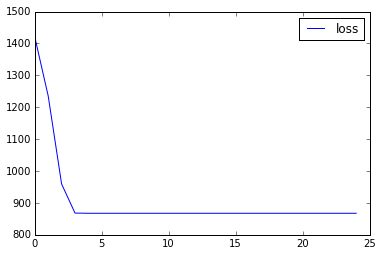

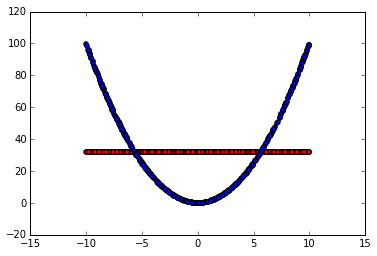

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, Dropout
from keras import optimizers

model = Sequential()
model.add(Dense(units=1, input_dim=1))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(output_dim=20, init='he_normal'))
model.add(Activation("relu"))
model.add(Dense(units=10, init='he_normal'))
model.add(Activation("relu"))
model.add(Dense(units=1))

sgd = optimizers.SGD(lr=0.0001)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.fit(x,y,epochs=25, shuffle=True, steps_per_epoch=100, callbacks=[plot_losses])

yy = model.predict(x, batch_size=32, verbose=0)

plt.scatter(x,yy,c='red')
plt.scatter(x,y,c='blue')
plt.show()

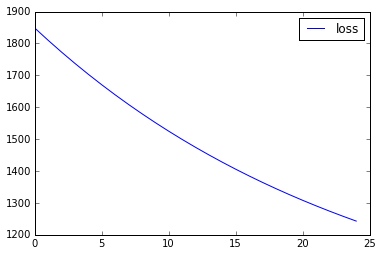

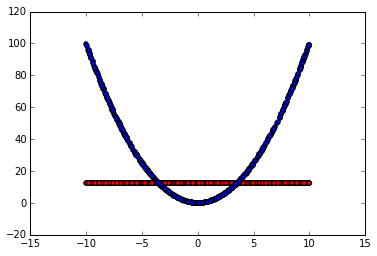

In [7]:
# Saneem Trials
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten
from keras import optimizers

model = Sequential()
model.add(Dense(output_dim=2, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=2))
model.add(Activation("relu"))
model.add(Dense(output_dim=2))
model.add(Activation("relu"))
model.add(Dense(output_dim=2))
model.add(Activation("relu"))
model.add(Dense(output_dim=2))
model.add(Activation("relu"))
model.add(Dense(output_dim=2))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))

#print model.summary()

sgd = optimizers.SGD(lr=0.0001, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.fit(x,y,epochs=25, shuffle=True,steps_per_epoch=100, callbacks=[plot_losses])

yy = model.predict(x, batch_size=32, verbose=0)

plt.scatter(x,yy,c='red')
plt.scatter(x,y,c='blue')
plt.show()

# Trying to replicate what is shown here: 
https://github.com/benjamin-recht/shallow-linear-net/blob/master/TwoLayerLinearNets.ipynb

In [8]:
def create_data(xdim=6, wdim=6, ydim=10, nsamples=1000,
               A_condition_number=1e-5):
    
    W1_initial = np.random.randn(ydim, wdim)
    W2_initial = np.random.randn(wdim, xdim)

    # the true map from x to y
    Atrue = np.linspace(1, A_condition_number, ydim
                       ).reshape(-1, 1) * np.random.rand(ydim, xdim)
    # the inputs
    X = np.random.randn(xdim, nsamples)
    # the y's to fit
    Ytrue = Atrue.dot(X)

    return (X.transpose(), Ytrue.transpose(), W1_initial.transpose(), W2_initial.transpose())

xdim=6; wdim=6; ydim=10; nsamples=1000
initial_params = create_data(xdim, wdim, ydim, nsamples)

for params in initial_params:
    print params.shape

(1000, 6)
(1000, 10)
(6, 10)
(6, 6)


In [9]:
import keras.backend as K
def squared_error(y_pred, y_true):
    return K.sum(K.square(y_pred - y_true), axis=-1)

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

model = Sequential()
model.add(Dense(units=xdim, input_dim=(xdim), use_bias=False))
model.add(Dense(units=ydim, use_bias=False))
print model.summary()

for layer in model.layers:
    print layer.name, layer.input_shape, layer.output_shape, layer.get_weights()[0].shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 6)                 36        
_________________________________________________________________
dense_23 (Dense)             (None, 10)                60        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________
None
dense_22 (None, 6) (None, 6) (6, 6)
dense_23 (None, 6) (None, 10) (6, 10)


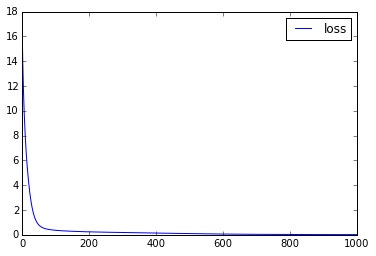

In [11]:
sgd = optimizers.SGD(lr=0.0001, nesterov=True)
model.compile(loss=squared_error, optimizer=sgd)
model.fit(initial_params[0],initial_params[1],epochs=1000, shuffle=True,steps_per_epoch=100, callbacks=[plot_losses])

#### Rather than use the default weight initializer and momentum, I used the weights from random initializations (same as Recht)

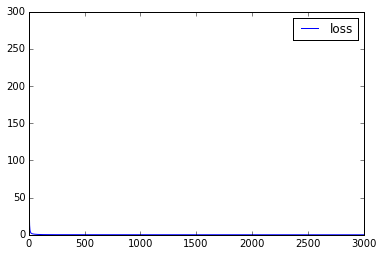

In [12]:
model.layers[0].set_weights([initial_params[3]])
model.layers[1].set_weights([initial_params[2]])

sgd = optimizers.SGD(lr=0.0001, nesterov=False)
model.compile(loss=squared_error, optimizer=sgd)
model.fit(initial_params[0],initial_params[1],epochs=3000, shuffle=True,steps_per_epoch=100, callbacks=[plot_losses])

## Results
#### With momentum on (nestrov) and He et al initialization: loss converged to 0.0352 after 1000 epochs
#### With momentum off and random initialization: loss converged to 0.0593 after 2500 epochs

### Slower but convering ...
### Looks like the most important aspect here is the initialization weights. 
#### But other than that it does seem to be converging, given that it is random data

## MNIST data

In [ ]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import fashion_mnist as mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dro

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[plot_losses])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
50432/60000 [========================>.....] - ETA: 26s - loss: 0.5867 - acc: 0.7947 

In [ ]:
y_test.shape

In [ ]:
from sklearn.manifold import TSNE
from keras.models import Model

## Visualize the embeddings of the model
fc = model.get_layer('dense_1').output
intermediate_layer_model = Model(model.inputs, fc)
source_only_emb = intermediate_layer_model.predict(x_test[:5000])

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)
source_only_tsne = tsne.fit_transform(source_only_emb)

plt.scatter(source_only_tsne[:,0], source_only_tsne[:,1])

## The labels are shuffled here:

In [ ]:
np.random.shuffle(y_train)
np.random.shuffle(y_test)

In [ ]:
def imshow_grid(images, shape=[2, 8]):
    """Plot images in a grid of a given shape."""
    fig = plt.figure(1)
    grid = ImageGrid(fig, 111, nrows_ncols=shape, axes_pad=0.05)

    size = shape[0] * shape[1]
    for i in range(size):
        grid[i].axis('off')
        grid[i].imshow(images[i])  # The AxesGrid object work as a list of axes.

    plt.show()
    
    
imshow_grid(x_train)
print y_train[:16]

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[plot_losses])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
from sklearn.manifold import TSNE
from keras.models import Model

## Visualize the embeddings of the model
fc = model.get_layer('dense_1').output
intermediate_layer_model = Model(model.inputs, fc)
source_only_emb = intermediate_layer_model.predict(x_test[:5000])

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)
source_only_tsne = tsne.fit_transform(source_only_emb)

plt.scatter(source_only_tsne[:,0], source_only_tsne[:,1])